In [14]:
!pip install wordcloud
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.8/222.8 kB 4.8 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for wordcloud: filename=wordcloud-1.9.2-cp311-cp311-macosx_11_0_arm64.whl size=151324 sha256=d6539430ff43b486fdc23eefa2459f1de637a1763d72ae6203c4c9783c9f1174
  Stored in directory: /Users/daehyunkim/Library/Caches/pip/wheels/3f/c6/5a/89824e1846baaa6d6d54b3a7b1e7deecc9ae6e7ed30a1c8b0e
Successfully built wordcloud


In [129]:
import pandas as pd

In [130]:
train_data = pd.read_csv('train.csv')
train_data.head()

,id,text,sentiment
0,TRAIN_00000,@SenWarren The problem with your massively fla...,2
1,TRAIN_00001,#Tweetlord is a twitter role playing game! Che...,1
2,TRAIN_00002,"I just slammed my elbow into a fridge, I did n...",2
3,TRAIN_00003,_beckett Thanks so much !,1
4,TRAIN_00004,My gauge fell out on superman,2


In [131]:
test_data = pd.read_csv('test.csv')
test_data.head()

,id,text
0,TEST_00000,@naima @dialogician Most of this footage is fr...
1,TEST_00001,@Haggis_UK @kevinhollinrake is willing to brea...
2,TEST_00002,‘No Magic Bullet’ for Preserving Abortion Acce...
3,TEST_00003,Can I also have a swirly flat white?
4,TEST_00004,Question: If the trains we have get disabled i...


In [132]:
# 데이터 사이즈 확인
train_data.shape, test_data.shape

((32000, 3), (48000, 2))

In [189]:
# Check the unique values and their counts in the sentiment column
sentiment_counts = train_data['sentiment'].value_counts()
sentiment_counts

2    20095
1     8049
0     3856
Name: sentiment, dtype: int64

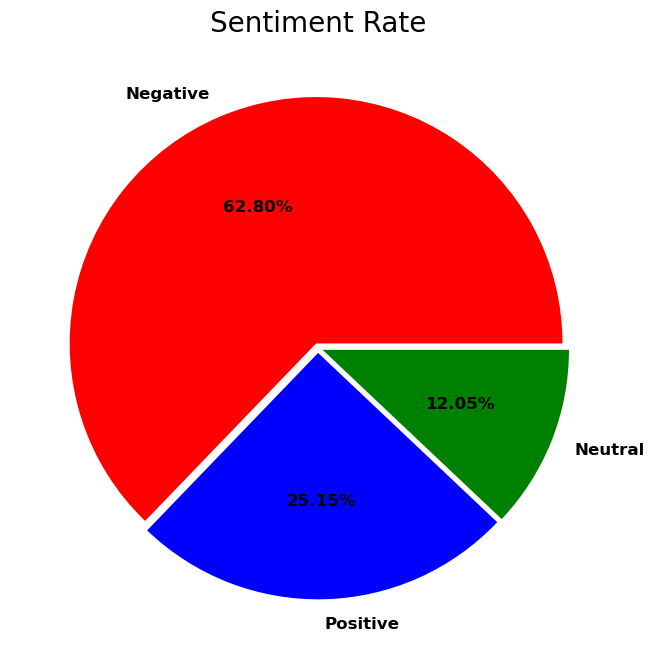

In [190]:
import matplotlib.pyplot as plt

# Plot settings
plt.figure(figsize=(8,8))
plt.title('Sentiment Rate', fontsize=20)

# Create the pie chart
pie = sentiment_counts.plot.pie(autopct='%1.2f%%', 
                                explode=[0.02, 0.02, 0.02], 
                                colors=['red', 'blue', 'green'], 
                                labels=['Negative', 'Positive', 'Neutral'], 
                                textprops={'fontsize': 12, 'weight': 'bold'})
plt.ylabel('')  # Remove the default y-label
plt.show()


In [191]:
def getLength(string):
    if str(type(string)) == "<class 'str'>":
        return len(string)
    else:
        return 0

In [192]:
text_length = train_data['text'].apply(lambda x: getLength(x))

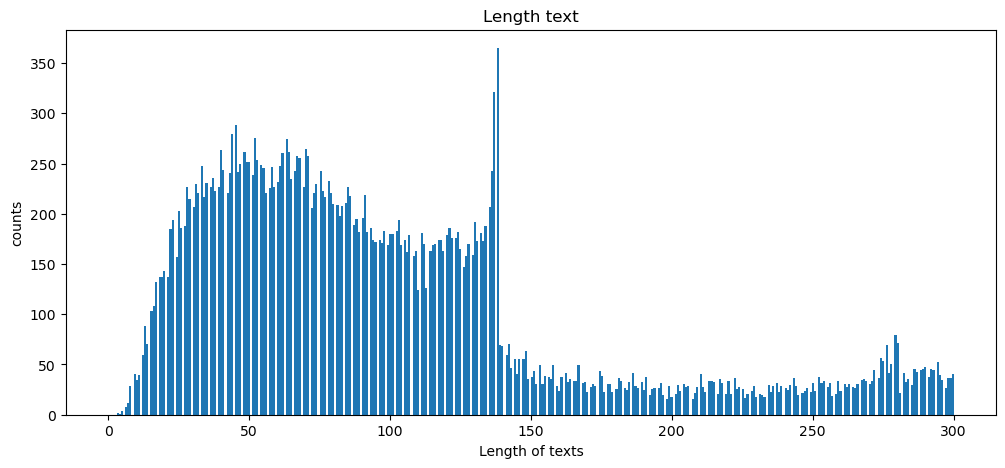

In [193]:
plt.figure(figsize=(12,5))

plt.title('Length text')
plt.ylabel('counts')
plt.xlabel('Length of texts')

hist = plt.hist(text_length, bins=400, range=[0,300])

### EDA

In [133]:
#1. 데이터의 결측치 확인
train_data.isnull().sum()

id           0
text         0
sentiment    0
dtype: int64

In [134]:
test_data.isnull().sum()

id      0
text    0
dtype: int64

### 모든 단어를 볼 수 있는 WordCloud를 활용하여 시각화

In [135]:
# 1. 필요한 모듈 불러오기
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
from matplotlib import rc
import pandas as pd 
# %matplotlib inline

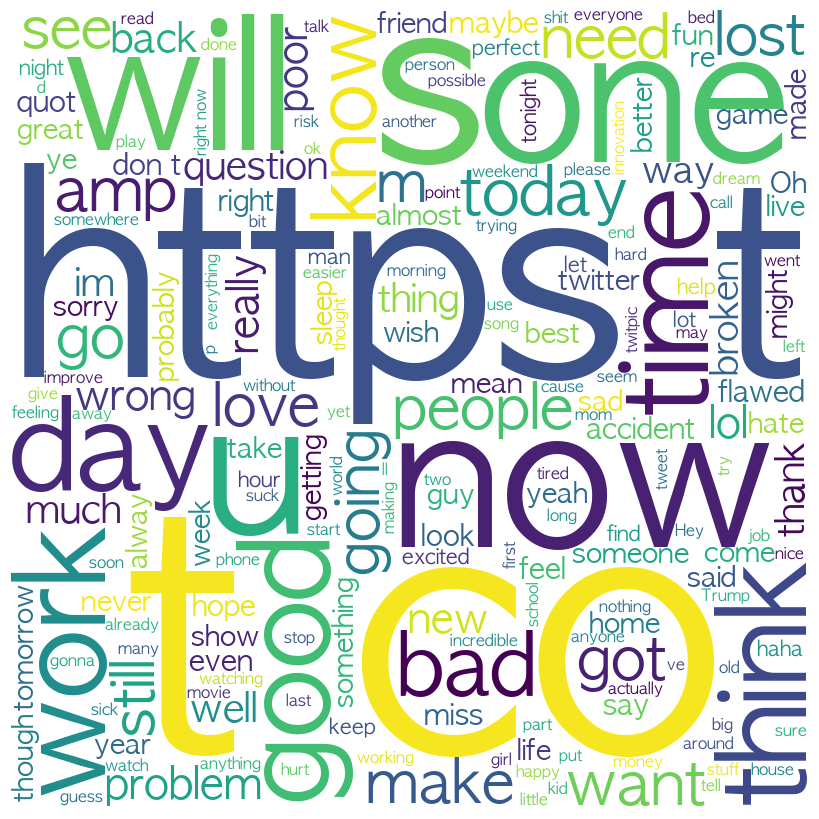

In [136]:
# 2. Stopwords 및 특수문자 필터링을 위한 준비

comment_words = ''
stopwords = set(STOPWORDS)

tokenized_text = []

# 3. 문장 데이터를 단어화하기
for val in train_data["text"]:

  # 문장을 string으로 만들기
  val = str(val)

  # 문장을 쪼개기
  tokens = val.split()

  tokenized_text.append(tokens)
  comment_words += " ".join(tokens) + " "

wordcloud = WordCloud(width = 800, height = 800, 
                font_path='AppleGothic.ttf',
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 

# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

### 토큰화 및 Stopwords(불용어) 제거
- train data

In [167]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
import re

stop_words_list = stopwords.words('english')
print('불용어 개수 :', len(stop_words_list))
print('불용어 출력 :',stop_words_list)

불용어 개수 : 179
불용어 출력 : ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', '

In [194]:
# 'text' 열의 데이터를 선택
train = train_data['text'].str.cat(sep=' ')  # 모든 행의 'text' 데이터를 하나의 문자열로 결합

# HTML 엔터티 제거
train = unescape(train)

# @와 기타 특수 기호 제거
train = re.sub(r'\W*\b\w{1,2}\b', '', train)  # @mention 제거
train = re.sub(r'[^\w\s]', '', train)  # 특수 기호 제거 (알파벳, 숫자, 공백을 제외한 모든 문자 제거)

stop_words = set(stopwords.words('english'))

word_tokens_train = word_tokenize(train)

result = []
for word in word_tokens_train:
    if word not in stop_words:
        result.append(word)

print('불용어 제거 전 :', word_tokens_train[:10], "...", len(word_tokens_train), "words total")
print('불용어 제거 후 :', result[:10], "...", len(result), "words total")

불용어 제거 전 : ['SenWarren', 'The', 'problem', 'with', 'your', 'massively', 'flawed', 'argument', 'one', 'guns'] ... 435234 words total
불용어 제거 후 : ['SenWarren', 'The', 'problem', 'massively', 'flawed', 'argument', 'one', 'guns', 'right', 'constitutionbill'] ... 317227 words total


In [169]:
from collections import Counter

def top_20_train(word_tokens_train):
    token_counts = Counter(word_tokens_train)
    top_20_words = token_counts.most_common(20)
    return top_20_words

print(top_20_train(result))

[('like', 1961), ('get', 1781), ('The', 1396), ('good', 1367), ('one', 1308), ('bad', 1262), ('know', 1207), ('day', 1199), ('got', 1191), ('time', 1144), ('work', 1095), ('think', 1079), ('people', 1052), ('today', 1024), ('going', 1019), ('really', 1014), ('want', 992), ('wrong', 928), ('back', 926), ('see', 919)]


In [170]:
# 필터링 되었는지 확인
word_tokens_train[0:10]

['SenWarren',
 'The',
 'problem',
 'with',
 'your',
 'massively',
 'flawed',
 'argument',
 'one',
 'guns']

- test data

In [171]:
# 'text' 열의 데이터를 선택
test = test_data['text'].str.cat(sep=' ')  # 모든 행의 'text' 데이터를 하나의 문자열로 결합

# HTML 엔터티 제거
test = unescape(test)

# @와 기타 특수 기호 제거
test = re.sub(r'\W*\b\w{1,2}\b', '', test)  # @mention 제거
test = re.sub(r'[^\w\s]', '', test)  # 특수 기호 제거 (알파벳, 숫자, 공백을 제외한 모든 문자 제거)

stop_words = set(stopwords.words('english'))

word_tokens_test = word_tokenize(test)

result = []
for word in word_tokens_test:
    if word not in stop_words:
        result.append(word)

print('불용어 제거 전 :', word_tokens_test[:10], "...", len(word_tokens_test), "words total")
print('불용어 제거 후 :', result[:10], "...", len(result), "words total")

불용어 제거 전 : ['naima', 'dialogician', 'Most', 'this', 'footage', 'from', 'marquee', 'games', 'their', 'careers'] ... 651230 words total
불용어 제거 후 : ['naima', 'dialogician', 'Most', 'footage', 'marquee', 'games', 'careers', 'collecting', 'footage', 'easy'] ... 477222 words total


In [172]:
from collections import Counter

def top_20_test(word_tokens_test):
    token_counts = Counter(word_tokens_test)
    top_20_words = token_counts.most_common(20)
    return top_20_words

print(top_20_test(result))

[('like', 2950), ('good', 2812), ('get', 2460), ('The', 1997), ('one', 1965), ('day', 1951), ('know', 1839), ('time', 1813), ('love', 1605), ('think', 1604), ('got', 1574), ('would', 1564), ('see', 1497), ('work', 1449), ('You', 1422), ('going', 1406), ('best', 1381), ('back', 1372), ('today', 1363), ('people', 1354)]


In [173]:
# 필터링 되었는지 확인
word_tokens_test[0:10]

['naima',
 'dialogician',
 'Most',
 'this',
 'footage',
 'from',
 'marquee',
 'games',
 'their',
 'careers']

### 추가 불용어 필터링 - Train, Test 공용

In [180]:
# 불용어 여기에 추가 하시면 됩니다.
additional_stopwords = ["The", "one", "day"] # test
stop_words.update(additional_stopwords)


In [181]:
# train 데이터 토큰화 및 불용어 제거
word_tokens_train = word_tokenize(train)
filtered_train = [word for word in word_tokens_train if word not in stop_words]

# test 데이터 토큰화 및 불용어 제거
word_tokens_test = word_tokenize(test)
filtered_test = [word for word in word_tokens_test if word not in stop_words]

# 각 데이터에 대한 상위 20개 단어 출력
print(top_20(filtered_train))
print(top_20(filtered_test))

[('like', 1961), ('get', 1781), ('good', 1367), ('bad', 1262), ('know', 1207), ('got', 1191), ('time', 1144), ('work', 1095), ('think', 1079), ('people', 1052), ('today', 1024), ('going', 1019), ('really', 1014), ('want', 992), ('wrong', 928), ('back', 926), ('see', 919), ('would', 911), ('You', 876), ('still', 850)]
[('like', 2950), ('good', 2812), ('get', 2460), ('know', 1839), ('time', 1813), ('love', 1605), ('think', 1604), ('got', 1574), ('would', 1564), ('see', 1497), ('work', 1449), ('You', 1422), ('going', 1406), ('best', 1381), ('back', 1372), ('today', 1363), ('people', 1354), ('really', 1342), ('much', 1321), ('want', 1276)]
